In [2]:
import numpy as np

# Datos del ejercicio
y_true = np.array([1,0,1,0,0,1,1,0,1,1,0,0,0,1,1,0,1,0,0,1])
y_prob = np.array([0.3,0.3,0.35,0.45,0.5,0.75,0.8,0.6,0.7,0.6,0.6,0.35,0.25,0.9,0.85,0.8,0.3,0.2,0.15,0.7])

## Transformar las predicciones con un threshold de 0.5

In [14]:
# WE CONVERT y_prob TO BINARY CLASSIFICATION USING THRESHOLD OF 0.5

# np.where -> CREATE NEW ARRAY
y_pred = np.where(y_prob >= 0.5, 1, 0)
# TRUE IF y_pred IS = 1
# FALSE IF y_pred IS = 0

print(f"\n y_true: {y_true}")
print(f"\n y_prob: {y_prob}")
print(f"\n y_pred: {y_pred}")


 y_true: [1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1]

 y_prob: [0.3  0.3  0.35 0.45 0.5  0.75 0.8  0.6  0.7  0.6  0.6  0.35 0.25 0.9
 0.85 0.8  0.3  0.2  0.15 0.7 ]

 y_pred: [0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1]


In [19]:
# OR
threshold = 0.5
y_pred = (y_prob >= threshold).astype(int)

## Calcular precision, recall y accuracy

In [10]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [20]:
precision = precision_score(y_true, y_pred) # how accurate the model's predictions are
recall = recall_score(y_true, y_pred) # good the model is at finding all the positive instances
accuracy = accuracy_score(y_true, y_pred)

print(f"\n Precision: {precision:.2f}")
print(f"\n Recall: {recall:.2f}")
print(f"\n Accuracy: {accuracy:.2f}")


 Precision: 0.64

 Recall: 0.70

 Accuracy: 0.65


## Muestra la matriz de confusión

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

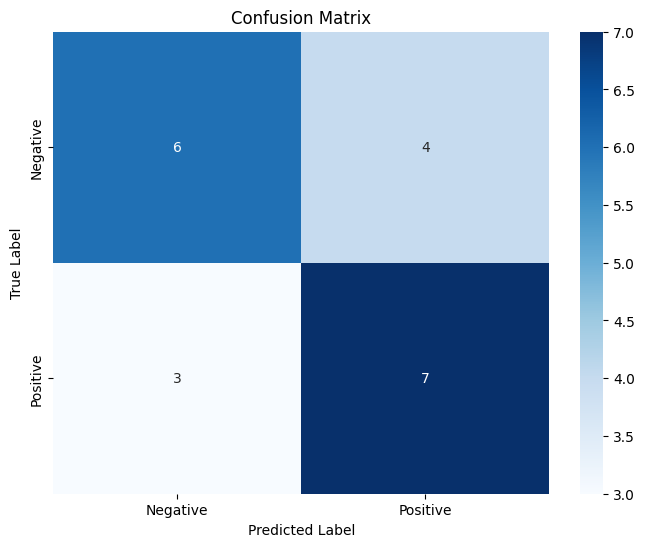

In [21]:
# CONFUSION MATRIX
# ARRAYS OF ARRAYS
confusion_mat = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')

ax.set_xticklabels(['Negative', 'Positive'])
ax.set_yticklabels(['Negative', 'Positive'])


plt.show()

## Muestra la Curva ROC y la AUC-ROC

In [23]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [24]:
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

AUC-ROC Score: 0.76


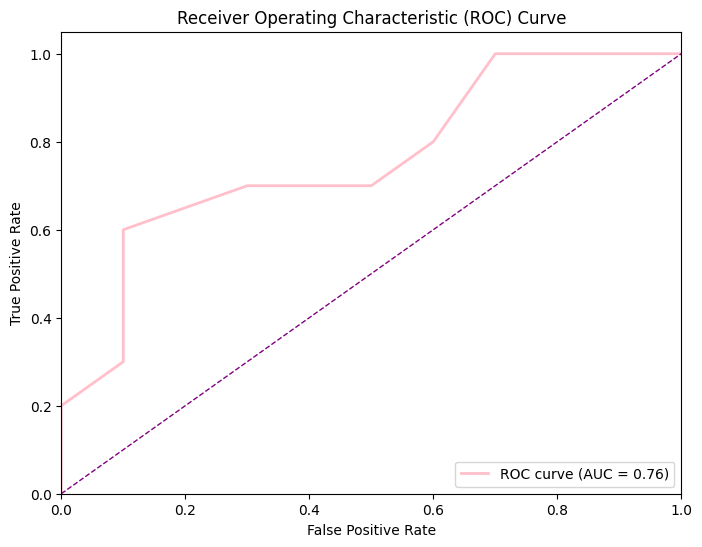

In [31]:
fig, ax = plt.subplots(figsize=(8, 6))

# ROC CURVE
ax.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='purple', lw=1, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc="lower right")
print(f"AUC-ROC Score: {roc_auc:.2f}")

plt.show()